In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("satis.csv")
df

,Tarix,Mağaza,Kart_nomresi,Transaksiya_id,Məhsul_nomresi,Məhsul_adi,Məhsul sayi,Ümumi satış
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [ ]:
df.shape

(264836, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Tarix           264836 non-null  int64  
 1   Mağaza          264836 non-null  int64  
 2   Kart_nomresi    264836 non-null  int64  
 3   Transaksiya_id  264836 non-null  int64  
 4   Məhsul_nomresi  264836 non-null  int64  
 5   Məhsul_adi      264836 non-null  object 
 6   Məhsul sayi     264836 non-null  int64  
 7   Ümumi satış     264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [ ]:
df.isnull().sum()

,0
Tarix,0
Mağaza,0
Kart_nomresi,0
Transaksiya_id,0
Məhsul_nomresi,0
Məhsul_adi,0
Məhsul sayi,0
Ümumi satış,0


In [ ]:
df.dtypes

,0
Tarix,int64
Mağaza,int64
Kart_nomresi,int64
Transaksiya_id,int64
Məhsul_nomresi,int64
Məhsul_adi,object
Məhsul sayi,int64
Ümumi satış,float64


In [ ]:
df['Tarix'] = pd.to_datetime(df['Tarix'], origin='1899-12-30', unit='D')

In [ ]:
df['Year'] = df['Tarix'].dt.year
df['Month'] = df['Tarix'].dt.month
df['Day'] = df['Tarix'].dt.day_name()

In [ ]:
df.dtypes["Tarix"]

dtype('<M8[ns]')

In [ ]:

import re

def extract_numbers(text):

    numbers = re.findall(r'\d+', text)
    if numbers:
        return numbers[0]  # If there are multiple groups of numbers, return the first one
    return ''

df['Gram'] = df['Məhsul_adi'].apply(extract_numbers)

df['Məhsul_adi'] = df['Məhsul_adi'].apply(lambda x: re.sub(r'\d+', '', x))


In [ ]:
df['Gram']=df['Gram'].astype('float')
df['Məhsul_adi']=df['Məhsul_adi'].str[:-1]

In [ ]:
df

,Tarix,Mağaza,Kart_nomresi,Transaksiya_id,Məhsul_nomresi,Məhsul_adi,Məhsul sayi,Ümumi satış,Year,Month,Day,Gram
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,2018,10,Wednesday,175.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,2019,5,Tuesday,175.0
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,2019,5,Monday,170.0
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion,5,15.0,2018,8,Friday,175.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili,3,13.8,2018,8,Saturday,150.0
...,...,...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream,2,10.8,2019,3,Saturday,175.0
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime,1,4.4,2018,8,Monday,175.0
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana,2,8.8,2018,11,Tuesday,170.0
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno,2,7.8,2018,12,Thursday,150.0


#Analysis for Chips

In [ ]:
df = df[df['Məhsul_adi'].str.contains('Chip', case=False, na=False)]
df

,Tarix,Mağaza,Kart_nomresi,Transaksiya_id,Məhsul_nomresi,Məhsul_adi,Məhsul sayi,Ümumi satış,Year,Month,Day,Gram
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,2018,10,Wednesday,175.0
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,2019,5,Monday,170.0
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion,5,15.0,2018,8,Friday,175.0
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar,1,5.7,2019,5,Thursday,330.0
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno,1,3.9,2018,8,Monday,150.0
...,...,...,...,...,...,...,...,...,...,...,...,...
264815,2018-11-04,271,271193,269365,33,Cobs Popd Swt/Chlli &Sr/Cream Chips,2,7.6,2018,11,Sunday,110.0
264816,2019-05-29,271,271193,269366,75,Cobs Popd Sea Salt Chips,2,7.6,2019,5,Wednesday,110.0
264826,2019-03-25,272,272194,269908,75,Cobs Popd Sea Salt Chips,2,7.6,2019,3,Monday,110.0
264830,2018-11-12,272,272319,270087,44,Thins Chips Light& Tangy,2,6.6,2018,11,Monday,175.0


In [ ]:
def categorize_chip(name):
    name = name.lower()

    if 'hot' in name.lower():
        return 'Hot'
    elif 'salt' in name.lower():
        return 'Salty'
    elif 'cheese' in name.lower():
        return 'Cheese'
    elif 'cream&onion' in name.lower() or 'cream' in name.lower():
        return 'Creamy&Onion'
    elif "mexican jalapeno" in name.lower():
      return  'Mexican Jalapeno'
    elif 'barbecue' in name.lower():
        return 'Barbecue'
    elif "smoked chipotle" in name.lower():
        return "Smoked Chipotle"
    elif "salt&vinegar" in name.lower():
        return "Salt & Vinegar"
    elif "tmato hrb&spce" in name.lower():
        return "Tmato Hrb&Spce"
    elif "swt/chlli&sr/cream chips" in name.lower():
        return "Swt/Chlli &Sr/Cream Chips"

    else:
        return 'Other'

In [ ]:
df['Category'] = df['Məhsul_adi'].apply(categorize_chip)

In [ ]:
df.value_counts("Məhsul_adi")

,count
Məhsul_adi,
Cobs Popd Swt/Chlli &Sr/Cream Chips,3269
Cobs Popd Sea Salt Chips,3265
Smiths Crnkle Chip Orgnl Big Bag,3233
Thins Potato Chips Hot & Spicy,3229
Doritos Corn Chips Cheese Supreme,3217
Doritos Corn Chip Mexican Jalapeno,3204
Smiths Crinkle Chips Salt & Vinegar,3197
Thins Chips Light& Tangy,3188
Doritos Corn Chip Southern Chicken,3172


In [ ]:
def extract_chip_type(name):
    name = name.lower()

    if 'd/style' in name:
        return 'D/Style'
    elif 'crinkle cut' in name:
        return 'Crinkle Cut'
    elif 'corn chip' in name or 'corn chips' in name:
        return 'Corn Chips'
    elif 'thin' in name:
        return 'Thin'
    elif 'french fries' in name:
        return 'French Fries'
    else:
        return 'Other'

df['Chip_Type'] = df['Məhsul_adi'].apply(extract_chip_type)


In [ ]:
df.value_counts("Chip_Type")

,count
Chip_Type,
Other,29783
Thin,18602
Corn Chips,17383
Crinkle Cut,5915
D/Style,1469
French Fries,1418


In [ ]:
df.value_counts("Category")

,count
Category,
Other,34032
Salty,16933
Cheese,7886
Creamy&Onion,6225
Hot,3229
Mexican Jalapeno,3204
Tmato Hrb&Spce,1572
Barbecue,1489


In [ ]:
df['Sirket']=df['Məhsul_adi'].str.split().str[0]

In [ ]:
df.value_counts("Sirket")

,count
Sirket,
Smiths,16872
Doritos,15874
Thins,14075
Cobs,9693
WW,7443
Natural,6050
Tostitos,3145
French,1418


In [ ]:
df

,Tarix,Mağaza,Kart_nomresi,Transaksiya_id,Məhsul_nomresi,Məhsul_adi,Məhsul sayi,Ümumi satış,Year,Month,Day,Gram,Category,Chip_Type,Sirket
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,2018,10,Wednesday,175.0,Salty,Other,Natural
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,2019,5,Monday,170.0,Other,Crinkle Cut,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion,5,15.0,2018,8,Friday,175.0,Creamy&Onion,Thin,Smiths
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar,1,5.7,2019,5,Thursday,330.0,Salty,Other,Smiths
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno,1,3.9,2018,8,Monday,150.0,Mexican Jalapeno,Corn Chips,Doritos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264815,2018-11-04,271,271193,269365,33,Cobs Popd Swt/Chlli &Sr/Cream Chips,2,7.6,2018,11,Sunday,110.0,Creamy&Onion,Other,Cobs
264816,2019-05-29,271,271193,269366,75,Cobs Popd Sea Salt Chips,2,7.6,2019,5,Wednesday,110.0,Salty,Other,Cobs
264826,2019-03-25,272,272194,269908,75,Cobs Popd Sea Salt Chips,2,7.6,2019,3,Monday,110.0,Salty,Other,Cobs
264830,2018-11-12,272,272319,270087,44,Thins Chips Light& Tangy,2,6.6,2018,11,Monday,175.0,Other,Thin,Thins


In [ ]:
df.shape

(74570, 8)

In [ ]:
top_products = df.groupby('Məhsul_adi')['Ümumi satış'].sum().sort_values(ascending=False)
top_products.head()

,Ümumi satış
Məhsul_adi,
Smiths Crnkle Chip Orgnl Big Bag,36367.6
Smiths Crinkle Chips Salt & Vinegar,34804.2
Doritos Corn Chips Cheese Supreme,27183.2
Doritos Corn Chips Nacho Cheese,26562.8
Tostitos Smoked Chipotle,26474.8


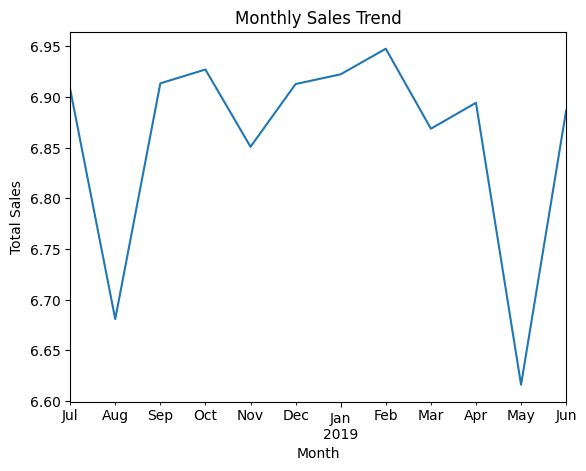

In [ ]:
monthly_sales = df.groupby(df['Tarix'].dt.to_period('M'))['Ümumi satış'].mean()

monthly_sales.plot(kind='line', title='Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()



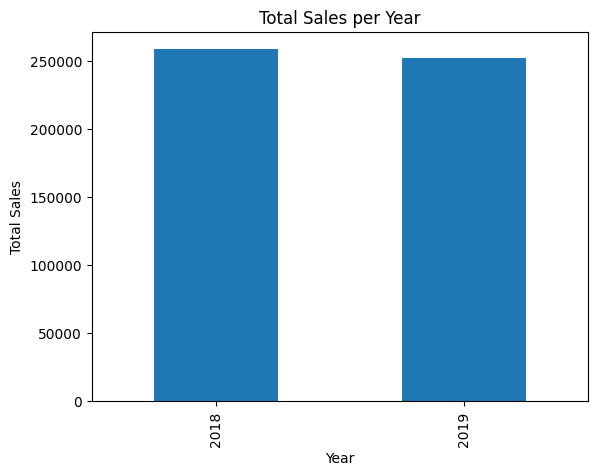

In [ ]:
df.groupby('Year')['Ümumi satış'].sum().plot(kind='bar')
plt.title('Total Sales per Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()


Məhsul_adi
Cobs Popd Sea Salt  Chips               6277
Cobs Popd Swt/Chlli &Sr/Cream Chips     6256
Thins Potato Chips  Hot & Spicy         6185
Doritos Corn Chips  Cheese Supreme      6180
Smiths Crnkle Chip  Orgnl Big Bag       6164
Doritos Corn Chip Mexican Jalapeno      6125
Smiths Crinkle Chips Salt & Vinegar     6106
Thins Chips Light&  Tangy               6095
Doritos Corn Chip Southern Chicken      6086
Cobs Popd Sour Crm  &Chives Chips       6038
Name: Məhsul sayi, dtype: int64


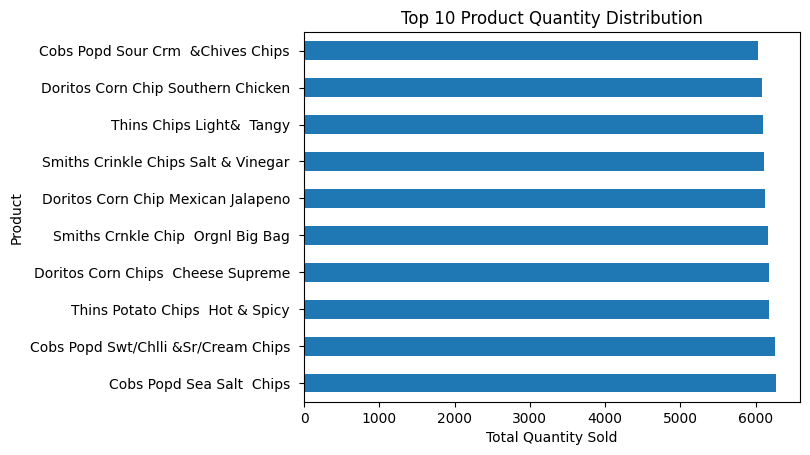

In [ ]:
top_quantity_products = df.groupby('Məhsul_adi')['Məhsul sayi'].sum().sort_values(ascending=False)
top_10_products = top_quantity_products.head(10)
print(top_10_products)

top_10_products.plot(kind='barh', title='Top 10 Product Quantity Distribution')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product')
plt.show()

Məhsul_adi
French Fries Potato Chips              2643
Thins Chips         Originl saltd      2727
Smiths Chip Thinly  CutSalt/Vinegr     2732
Natural ChipCo      Hony Soy Chckn     2758
Smiths Crinkle Cut  Chips Original     2759
WW D/Style Chip     Sea Salt           2763
Smiths Chip Thinly  S/Cream&Onion      2771
Natural Chip        Compny SeaSalt     2777
Smiths Crinkle Cut  Chips Chs&Onion    2797
WW Original Stacked Chips              2802
Name: Məhsul sayi, dtype: int64


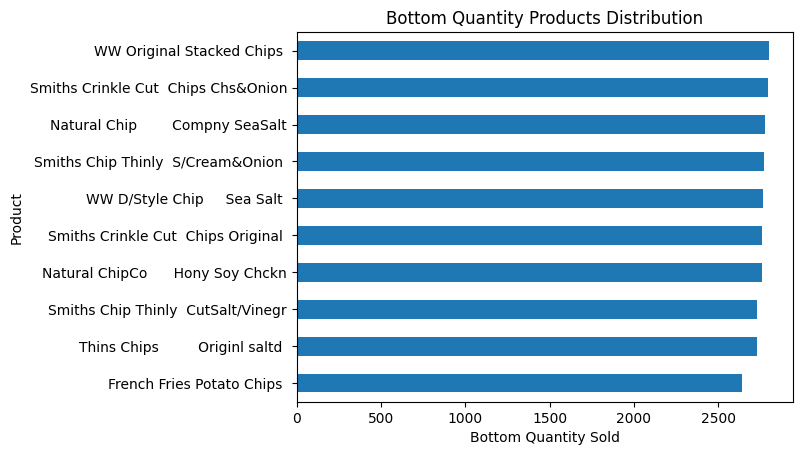

In [ ]:
bottom_quantity_products = df.groupby('Məhsul_adi')['Məhsul sayi'].sum().sort_values(ascending=True)
bottom_quantity_products = bottom_quantity_products.head(10)
print(bottom_quantity_products)

bottom_quantity_products.plot(kind='barh', title='Bottom Quantity Products Distribution')
plt.xlabel('Bottom Quantity Sold')
plt.ylabel('Product')
plt.show()

<Axes: title={'center': 'Chip Weight Distribution'}, xlabel='Gram'>

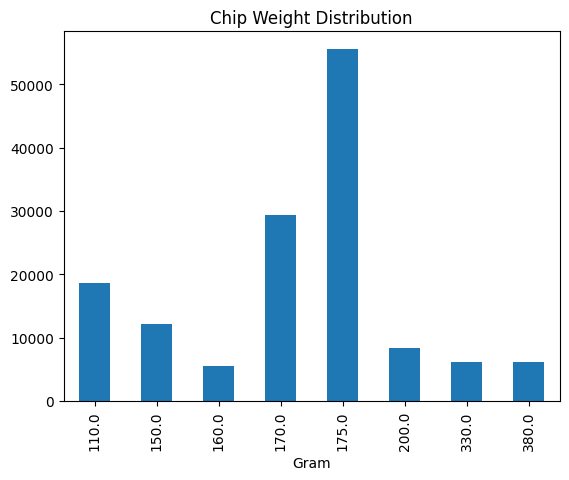

In [ ]:
weight_distribution = df.groupby('Gram')['Məhsul sayi'].sum()
weight_distribution.plot(kind='bar', title='Chip Weight Distribution')


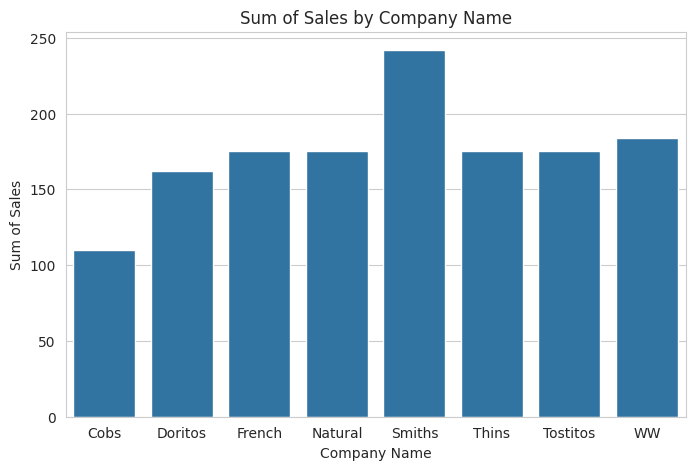

In [ ]:
avg_qram=df.groupby(['Sirket'])['Gram'].mean().reset_index()
sns.set_style("whitegrid")

plt.figure(figsize=(8, 5))
sns.barplot(data=avg_qram, x='Sirket', y='Gram')

plt.title('Sum of Sales by Company Name')
plt.xlabel('Company Name')
plt.ylabel('Sum of Sales')

plt.show()

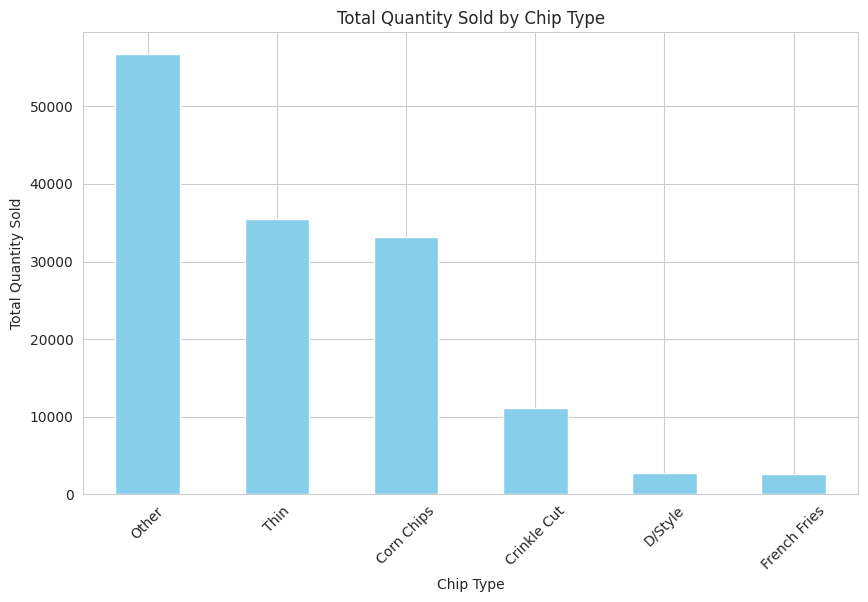

In [ ]:
popular_chip_types = df.groupby('Chip_Type')['Məhsul sayi'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
popular_chip_types.plot(kind='bar', color='skyblue')
plt.title('Total Quantity Sold by Chip Type')
plt.xlabel('Chip Type')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

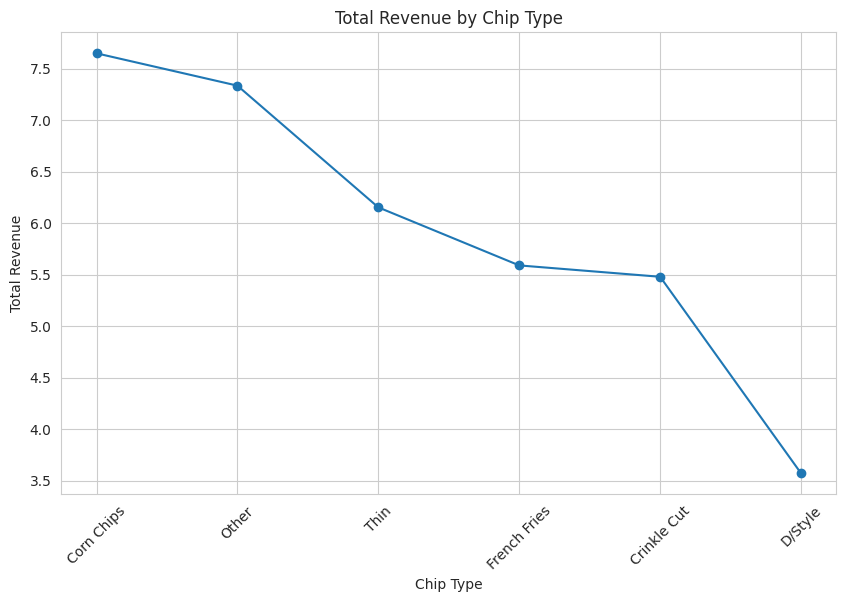

In [ ]:
revenue_by_chip_type = df.groupby('Chip_Type')['Ümumi satış'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.plot(revenue_by_chip_type.index, revenue_by_chip_type.values, marker='o')
plt.title('Total Revenue by Chip Type')
plt.xlabel('Chip Type')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

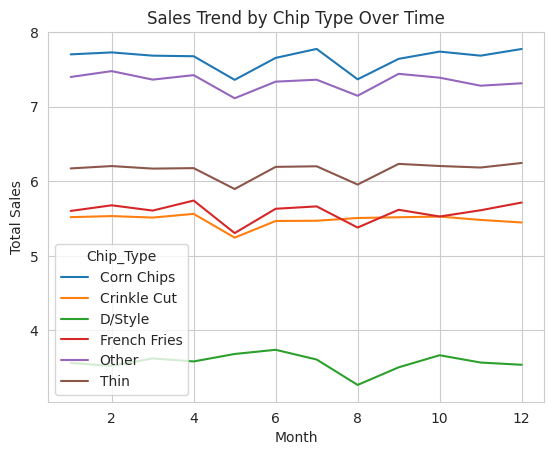

In [ ]:
sales_trend = df.groupby(['Month', 'Chip_Type'])['Ümumi satış'].mean().unstack().plot(kind='line')
plt.title('Sales Trend by Chip Type Over Time')
plt.ylabel('Total Sales')
plt.show()

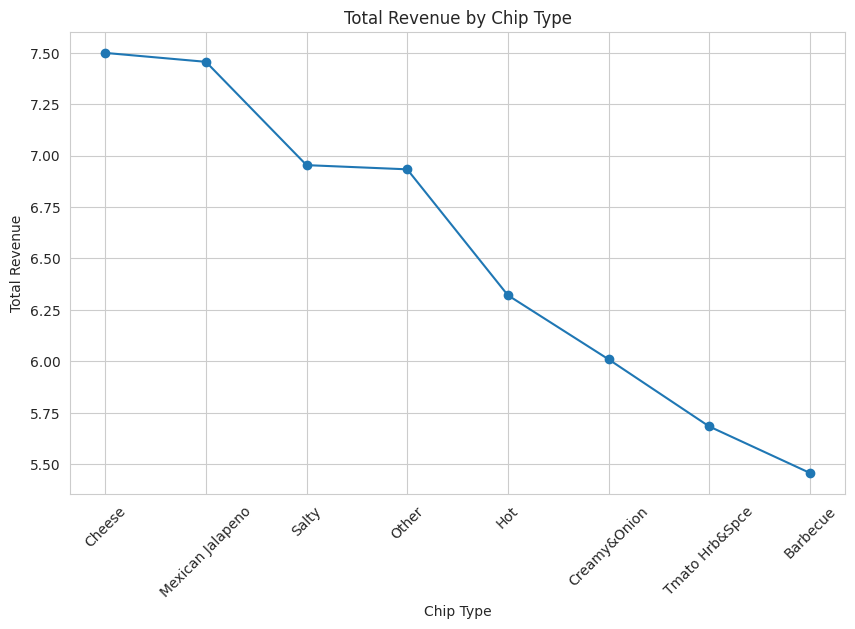

In [ ]:
revenue_by_chip_type = df.groupby('Category')['Ümumi satış'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.plot(revenue_by_chip_type.index, revenue_by_chip_type.values, marker='o')
plt.title('Total Revenue by Chip Type')
plt.xlabel('Chip Type')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

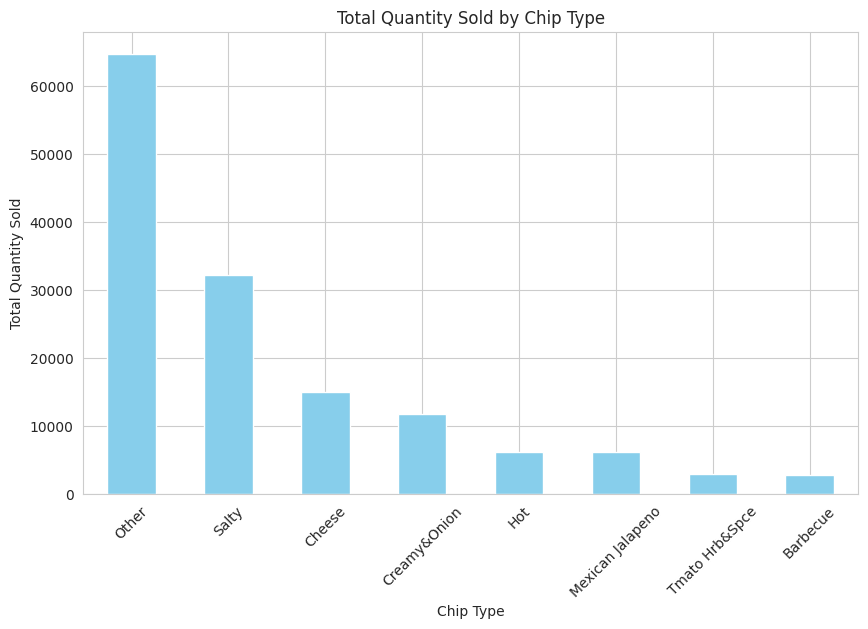

In [ ]:
popular_chip_types = df.groupby('Category')['Məhsul sayi'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
popular_chip_types.plot(kind='bar', color='skyblue')
plt.title('Total Quantity Sold by Chip Type')
plt.xlabel('Chip Type')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

# Modelling

In [ ]:
df = df.drop(columns=["Tarix","Mağaza","Transaksiya_id","Kart_nomresi","Məhsul_nomresi","Year","Məhsul_adi"])

In [ ]:
from sklearn.preprocessing import RobustScaler,OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
y=df[['Ümumi satış']]
X=df.drop(['Ümumi satış'],axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2,random_state=10 )

In [ ]:
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
estimator = LinearRegression()

rfe = RFE(estimator=estimator, n_features_to_select=12)

In [ ]:
numeric_features = ['Məhsul sayi','Gram']
categorical_features = ['Sirket', 'Chip_Type','Category','Day','Month']

In [ ]:
numeric_transformer = Pipeline(
    [('scaler', RobustScaler())])

categorical_transformer = Pipeline(
    [('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
preprocessor = ColumnTransformer(
    [('num', numeric_transformer, numeric_features ),
        ('cat', categorical_transformer, categorical_features)])

In [ ]:
my_pipeline = Pipeline(
    [('preprocessor', preprocessor # `transformers`
      ),( 'feature_selection',rfe),
        ('regressor', LinearRegression() # Estimator
        )])

In [ ]:
from sklearn.svm import SVR

my_pipeline2 = Pipeline(
    [('preprocessor', preprocessor ),
     ( 'feature_selection',rfe),
        ('regressor', SVR())])

In [ ]:
processed_data = numeric_transformer.fit_transform(X_train[numeric_features])
processed_data[:5]

array([[ 0.        ,  0.        ],
       [ 0.        , -1.66666667],
       [ 0.        , 13.66666667],
       [-1.        ,  0.        ],
       [ 0.        ,  0.        ]])

In [ ]:
processed_data2 = categorical_transformer.fit_transform(X_train[categorical_features])
processed_data2

<59656x41 sparse matrix of type '<class 'numpy.float64'>'
	with 298280 stored elements in Compressed Sparse Row format>

# Linear Regression

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
my_pipeline.fit(X_train, y_train)
y_pred = my_pipeline.predict(X_test)

r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]  # number of samples
p = X_test.shape[1]  # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)


print(f"R-squared (R²): {r2:.3f}")
print(f"Adjusted R-squared (Adjusted R²): {adjusted_r2:.3f}")
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.3f}")

R-squared (R²): 0.971
Adjusted R-squared (Adjusted R²): 0.971
Mean Squared Error (MSE): 0.150


# SVR

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
my_pipeline2.fit(X_train, y_train)
y_pred = my_pipeline2.predict(X_test)

r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]  # number of samples
p = X_test.shape[1]  # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)


print(f"R-squared (R²): {r2:.3f}")
print(f"Adjusted R-squared (Adjusted R²): {adjusted_r2:.3f}")
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.3f}")

R-squared (R²): 0.991
Adjusted R-squared (Adjusted R²): 0.991
Mean Squared Error (MSE): 0.048


In [ ]:
import pickle

In [ ]:
filename="modell.sav"
pickle.dump(my_pipeline,open(filename,"wb"))

In [ ]:
#load model
load_model=pickle.load(open("modell.sav","rb"))

In [ ]:
print(type(load_model))

<class 'sklearn.pipeline.Pipeline'>


In [ ]:
# chip_types = {'Other':0, 'Thin':1, 'Corn Chips':2,"Crinkle Cut":3,"D/Style":4,"French Fries ":5} # Replace with actual chip types
# categories = {'Other':0, 'Salty':1, 'Cheese':2,"Creamy&Onion":3,"Hot":4,"Mexican Jalapeno":5,"Tmato Hrb&Spce":6,"Barbecue":7}  # Replace with actual categories
# sirket_options = {'Smiths':0, 'Doritos':1, 'Thins':2,"Cobs":3,"WW":4,"Natural":5,"Tostitos":6,"French":7}
# # Create input fields for user data
# feature1 = st.number_input("Məhsul sayi", min_value=0.0, max_value=100.0)
# feature2 = st.number_input("Gram", min_value=0.0, max_value=1000.0)
# feature3 = st.selectbox("Chip Type", options=list(chip_types.keys()))
# feature4 = st.selectbox("Category", options=list(categories.keys()))
# feature5 = st.selectbox("Sirket", options=list(sirket_options.keys()))
# feature6 = st.number_input("Month", min_value=1, max_value=12)
# feature7 = st.number_input("Day", min_value=1, max_value=31)

# # Convert categorical inputs to numeric values
# feature3 = chip_types[feature3]
# feature4 = categories[feature4]
# feature5 = sirket_options[feature5]

# Create a DataFrame for the input data
input_df = pd.DataFrame([{
    'Məhsul sayi': feature1,
    'Gram': feature2,
    'Chip_Type': feature3,
    'Category': feature4,
    'Sirket': feature5,
    'Month': feature6,
    'Day': feature7
}])

# Debug input data
st.write("Input DataFrame:")
st.write(input_df)
st.write("Data types:")
st.write(input_df.dtypes)

input_df = input_df.fillna(0).astype(float)

# Prediction button
if st.button("Predict"):
    try:
        prediction = load_model.predict(input_df)
        st.write("The predicted value is:", prediction[0])
    except Exception as e:
        st.error(f"Error making prediction: {e}")